<a href="https://colab.research.google.com/github/Laura-Neff/BaggingPasting/blob/main/BaggingPasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
insurance_data = pd.read_csv('insurance.csv')

insurance_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
247,24,male,35.860,0,no,southeast,1986.93340
1333,50,male,30.970,3,no,northwest,10600.54830
565,19,female,30.495,0,no,northwest,2128.43105
64,20,female,22.420,0,yes,northwest,14711.74380
479,23,male,32.560,0,no,southeast,1824.28540
34,28,male,36.400,1,yes,southwest,51194.55914
1129,19,female,18.600,0,no,southwest,1728.89700
178,46,female,28.900,2,no,southwest,8823.27900
948,42,male,31.255,0,no,northwest,6358.77645
215,41,female,37.100,2,no,southwest,7371.77200


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_data_correlation = insurance_data.corr()

insurance_data_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


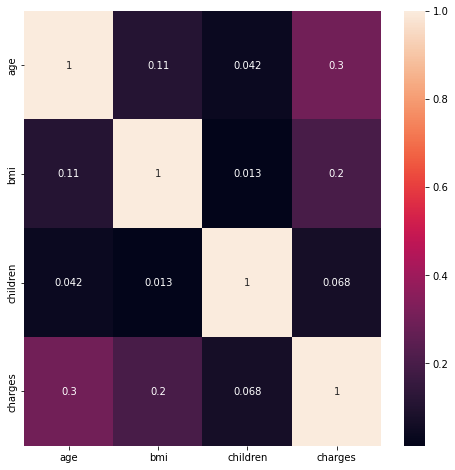

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(insurance_data_correlation, annot=True)

In [ ]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [ ]:
insurance_data['region'] = label_encoding.fit_transform(insurance_data['region'].astype(str))

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [ ]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
insurance_data = pd.get_dummies(insurance_data, columns=['sex',
                                                         'smoker'])

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
1129,19,18.600,0,3,1728.89700,1,0,1,0
612,18,33.155,0,0,2207.69745,1,0,1,0
242,55,26.800,1,3,35160.13457,1,0,1,0
1315,18,28.310,1,0,11272.33139,0,1,1,0
563,50,44.770,1,2,9058.73030,0,1,1,0
902,26,27.265,3,0,4661.28635,0,1,1,0
291,29,29.640,1,0,20277.80751,0,1,1,0
579,25,23.465,0,0,3206.49135,1,0,1,0
1122,53,36.860,3,1,46661.44240,1,0,0,1
1100,33,19.095,2,0,16776.30405,1,0,0,1


In [ ]:
insurance_data.to_csv('insurance_processed.csv', index=False)

In [ ]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


In [ ]:
insurance_data = pd.read_csv('insurance_processed.csv')

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
338,50,32.300,1,0,41919.09700,0,1,0,1
122,20,28.975,0,1,2257.47525,1,0,1,0
649,58,32.965,0,0,12430.95335,1,0,1,0
778,35,34.320,3,2,5934.37980,0,1,1,0
809,25,25.840,1,0,3309.79260,0,1,1,0
272,41,37.050,2,1,7265.70250,0,1,1,0
236,18,26.730,0,2,1615.76670,1,0,1,0
1310,42,26.315,1,1,6940.90985,0,1,1,0
1281,47,27.645,2,1,24535.69855,1,0,0,1
3,33,22.705,0,1,21984.47061,0,1,1,0


In [ ]:
insurance_data.shape

(1338, 9)

In [ ]:
X = insurance_data.drop('charges', axis=1)

Y = insurance_data['charges']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

((1070, 8), (1070,))

In [ ]:
x_test.shape, y_test.shape

((268, 8), (268,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=True,
                           max_samples=0.8,
                           n_jobs=-1,
                           oob_score=True)

bag_reg.fit(x_train, y_train)

#We are gonna train our ensemble of decision trees by using a bagging regressor
#use 500 decision trees
#sample 80% of the samples in the dataset with replacement (put sample back after each iteration); this is bagging (max_samples = .8)
#n_jobs = -1; individual predictors in an averaging model can be trained in parallel; as many processes on CPU will be spun up to perform the training
#when you specify oob score = True for bagging model, you want ensemble model to be evaluated on out-of-bag instances for each predictor and return a score

#out of bag predictor evaluates samples not encountered during training


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [ ]:
bag_reg.oob_score_

0.8507610935722225

In [ ]:
from sklearn.metrics import r2_score

y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8136477620163519

In [ ]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=0.9,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

#bootsrap=False means you will sample 90% of the samples in the dataset without replacement; this is pasting
#it's like when you have a card deck 
#typically models using bagging perform better than pasting
#bagging = higher bias, lower variance

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 max_samples=0.9, n_estimators=500, n_jobs=-1)

In [ ]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7628843387236244